**Código inserido no Data Pipeline (DAG - Directed Acyclic Graph)**

In [86]:
#importando as bibliotecas 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import catboost
import pycaret

In [87]:
# !pip install catboost

In [88]:
#Conectando a base de dados de produção.

path = "C:\\Users\\Rubeus\\Downloads\\Trabalho Airflow e StreamLit\\AirFlow\\database\\"

path_db_producao = path + '//StudentsPerformance.db'

connect_db_estudantes = sqlite3.connect(path_db_producao)

In [89]:
# Definindo a query para selecionar os dados.

query = r"""
        SELECT * FROM Students
        """

In [90]:
# Selecionando os dados no banco de dados e criando o Dataframe.

dataset_df = pd.read_sql_query(query, connect_db_estudantes)


In [91]:
dataset_df.head(10)

,gender,race_ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [92]:
# Conversão dos atributos categóricos em colunas com valores binários

dummy_gender = pd.get_dummies(dataset_df['gender'])

dummy_race_ethnicity = pd.get_dummies(dataset_df['race_ethnicity'])

dummy_lvlEdu = pd.get_dummies(dataset_df['parental level of education'])

dummy_lunch = pd.get_dummies(dataset_df['lunch'])

dummy_preparation = pd.get_dummies(dataset_df['test preparation course'])


dataset_df = pd.concat([dataset_df, dummy_gender, dummy_race_ethnicity, dummy_lvlEdu, dummy_lunch, dummy_preparation], axis = 1)
dataset_df = dataset_df.drop(['gender', 'race_ethnicity', 'parental level of education', 'lunch', 'test preparation course'], axis = 1)

dataset_df[['female', 'male', 'group A', 'group B', 'group C', 'group D', 'group E', "associate's degree", "bachelor's degree", "high school", "some college", 'some high school', 'free/reduced', 'standard', 'completed', 'none']] = dataset_df[['female', 'male', 'group A', 'group B', 'group C', 'group D', 'group E', "associate's degree", "bachelor's degree", "high school", "some college", 'some high school', 'free/reduced', 'standard', 'completed', 'none']].astype(int)


In [93]:
dataset_df.isna().sum()

math score            0
reading score         0
writing score         0
female                0
male                  0
group A               0
group B               0
group C               0
group D               0
group E               0
associate's degree    0
bachelor's degree     0
high school           0
master's degree       0
some college          0
some high school      0
free/reduced          0
standard              0
completed             0
none                  0
dtype: int64

**Manipulação do arquivo .csv gerado pelo airflow**

In [94]:
import os

# Definir o caminho completo do diretório de exportação
caminho_exportacao = "C:\\Users\\Rubeus\\Downloads\\Trabalho Airflow e StreamLit\\AirFlow\\database"

# Combinar o caminho completo com o nome do arquivo
caminho_arquivo = os.path.join(caminho_exportacao, "studentsNovo.csv")

# Exportar o DataFrame para o arquivo CSV no caminho especificado
dataset_df.to_csv(caminho_arquivo, index=False)

In [95]:
url = "C:\\Users\\Rubeus\\Downloads\\Trabalho Airflow e StreamLit\\AirFlow\\database\\studentsNovo.csv"

data = pd.read_csv(url)

In [96]:
data.head(10)

,math score,reading score,writing score,female,male,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,free/reduced,standard,completed,none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
5,71,83,78,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1
6,88,95,92,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
7,40,43,39,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
8,64,64,67,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
9,38,60,50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1


In [97]:
# Exibindo as informações da base de dados

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   math score          1000 non-null   int64
 1   reading score       1000 non-null   int64
 2   writing score       1000 non-null   int64
 3   female              1000 non-null   int64
 4   male                1000 non-null   int64
 5   group A             1000 non-null   int64
 6   group B             1000 non-null   int64
 7   group C             1000 non-null   int64
 8   group D             1000 non-null   int64
 9   group E             1000 non-null   int64
 10  associate's degree  1000 non-null   int64
 11  bachelor's degree   1000 non-null   int64
 12  high school         1000 non-null   int64
 13  master's degree     1000 non-null   int64
 14  some college        1000 non-null   int64
 15  some high school    1000 non-null   int64
 16  free/reduced        1000 non-null   int64
 

In [98]:
# Análise Estatística Básica.

data.describe()

,math score,reading score,writing score,female,male,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,free/reduced,standard,completed,none
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,0.518000,0.482000,0.089000,0.190000,0.319000,0.262000,0.140000,0.222000,0.11800,0.196000,0.059000,0.226000,0.179000,0.355000,0.645000,0.358000,0.642000
std,15.16308,14.600192,15.195657,0.499926,0.499926,0.284886,0.392497,0.466322,0.439943,0.347161,0.415799,0.32277,0.397167,0.235743,0.418448,0.383544,0.478753,0.478753,0.479652,0.479652
min,0.00000,17.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.00000,59.000000,57.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,66.00000,70.000000,69.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,77.00000,79.000000,79.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,100.00000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

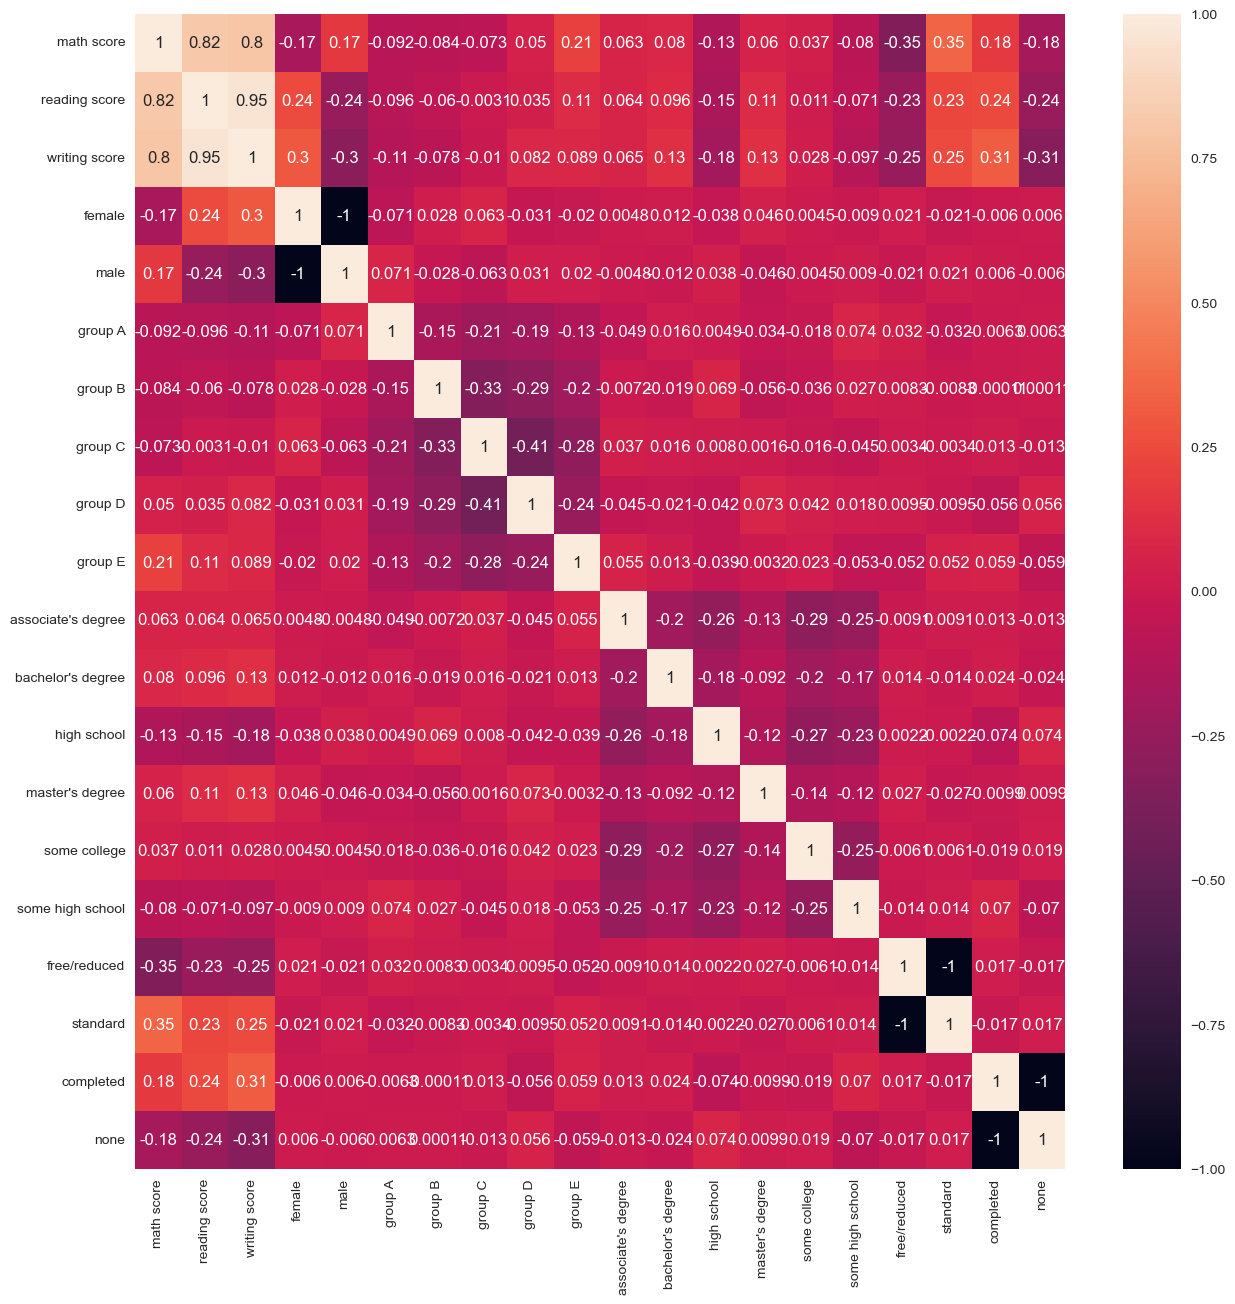

In [99]:
# Verificando a correlação dos atributos

plt.figure(figsize =(15,15))
cor = data.corr()
sns.heatmap(cor,annot =True)

In [100]:
#Distribuição das notas de matemática

import plotly.express as px
df = px.data.tips()
fig = px.histogram(data, x="math score", marginal="rug", hover_data=data.columns)
fig.show()

In [101]:
import plotly.express as px
fig = px.box(data, x="math score", points="all")
fig.show()

**Pré-processamento dos dados**

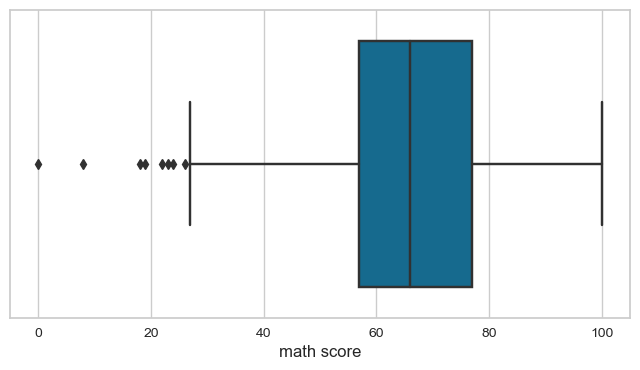

In [102]:
# Detecção de outliers

plt.figure(figsize=(8, 4))
sns.boxplot(x=data['math score'])
plt.show()

# O intervalo de outliers vai da nota 0 até 27

In [103]:
#Quartil 1 = 25% dos dados.


Q1 = data["math score"].quantile(.25)

#Quantil 3 = 75% dos dados.

Q3 = data["math score"].quantile(.75)

#Faixa de Intervalo Interqualítico

IQR = Q3 - Q1

#Calculando os limites

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [104]:
#Definindo a seleção dos registros

data_clean = data[data["math score"] >= lower] 

data_clean = data_clean[data_clean["math score"] <= upper]

In [108]:
data_clean.describe()

,math score,reading score,writing score,female,male,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,free/reduced,standard,completed,none
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,66.480847,69.461694,68.373992,0.514113,0.485887,0.089718,0.186492,0.319556,0.263105,0.141129,0.222782,0.118952,0.195565,0.059476,0.225806,0.177419,0.350806,0.649194,0.359879,0.640121
std,14.559999,14.269305,14.812186,0.500053,0.500053,0.285921,0.389700,0.466540,0.440541,0.348330,0.416323,0.323895,0.396835,0.236632,0.418323,0.382216,0.477463,0.477463,0.480207,0.480207
min,27.000000,23.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,60.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,66.000000,70.000000,69.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,77.000000,80.000000,79.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Separação da feature e das classes**

In [114]:
# Renomear colunas substituindo espaços por underscores
data = data.rename(columns={'math score': 'math_score'})

In [115]:
# M.L

y = data['math_score']
X = data.drop(['math_score'],axis =1)

In [116]:
# dataframe com o conjunto de dados que irão formar a predição da nota de matemática

print(X)

     reading score  writing score  female  male  group A  group B  group C  \
0               72             74       1     0        0        1        0   
1               90             88       1     0        0        0        1   
2               95             93       1     0        0        1        0   
3               57             44       0     1        1        0        0   
4               78             75       0     1        0        0        1   
..             ...            ...     ...   ...      ...      ...      ...   
995             99             95       1     0        0        0        0   
996             55             55       0     1        0        0        1   
997             71             65       1     0        0        0        1   
998             78             77       1     0        0        0        0   
999             86             86       1     0        0        0        0   

     group D  group E  associate's degree  bachelor's degree  h

In [118]:
# dataframe com as notas reais de matemática

print(y)

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64


In [136]:
# Renomear colunas substituindo espaços por underscores
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace("'", '')
data.columns = data.columns.str.replace("/", '')

import os

# Definir o caminho completo do diretório de exportação
caminho_exportacao = "C:\\Users\\Rubeus\\Downloads\\Trabalho Airflow e StreamLit\\AirFlow\\database"

# Combinar o caminho completo com o nome do arquivo
caminho_arquivo = os.path.join(caminho_exportacao, "students.csv")

# Exportar o DataFrame para o arquivo CSV no caminho especificado
data.to_csv(caminho_arquivo, index=False)

In [137]:
#Separando os conjuntos de treino e teste.

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sklearn

def calcula_metricas(y_test,preds):
    print('MAE:', mean_absolute_error(y_test, preds))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))
    print('R2:', r2_score(y_test, preds))

In [138]:
# Vou manter o padrão de 30% para o tamanho do teste

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3)

In [139]:
from pycaret.regression import *

In [140]:
numeric_features = ['reading_score', 'writing_score', 'female', 'male', 'group_A', 'group_B', 'group_C', 'group_D', 'group_E', 'associates_degree', 'bachelors_degree', 'high_school', 'masters_degree', 'some_college', 'some_high_school', 'freereduced', 'standard', 'completed', 'none']

In [141]:
s = setup( data
          ,target = 'math_score'
          ,numeric_features = ['reading_score',
                               'writing_score',
                               'female',
                               'male',
                               'group_A',
                               'group_B',
                               'group_C',
                               'group_D',
                               'group_E',
                               "associates_degree",
                               "bachelors_degree",
                               'high_school',
                               'masters_degree',
                               'some_college',
                               'some_high_school',
                               'freereduced',
                               'standard',
                               'completed',
                               'none']
          ,fold_shuffle=True
          ,log_experiment = True
          ,experiment_name = 'exp_bootcamp'
         )

,Description,Value
0,Session id,5498
1,Target,math_score
2,Target type,Regression
3,Original data shape,"(1000, 20)"
4,Transformed data shape,"(1000, 20)"
5,Transformed train set shape,"(700, 20)"
6,Transformed test set shape,"(300, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


In [142]:
#Comparando os modelos

best = compare_models(fold = 5)

models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,4.2559,28.6471,5.3352,0.8784,0.1045,0.0705,0.3140
ridge,Ridge Regression,4.2576,28.6578,5.3360,0.8783,0.1042,0.0705,0.3380
lr,Linear Regression,4.2591,28.6710,5.3371,0.8782,0.1040,0.0705,4.1700
huber,Huber Regressor,4.2725,28.7715,5.3467,0.8779,0.1041,0.0708,0.3640
lar,Least Angle Regression,4.2605,28.9400,5.3625,0.8772,0.1051,0.0709,0.3460
gbr,Gradient Boosting Regressor,4.4643,32.8207,5.7071,0.8604,0.1324,0.0748,0.5740
catboost,CatBoost Regressor,4.7068,35.3499,5.9183,0.8499,0.1355,0.0785,2.0300
lightgbm,Light Gradient Boosting Machine,4.8431,37.4923,6.0987,0.8404,0.1442,0.0818,1.2440
ada,AdaBoost Regressor,4.9830,39.4153,6.2546,0.8341,0.1441,0.0844,0.5260
rf,Random Forest Regressor,4.8949,39.4076,6.2583,0.8328,0.1436,0.0822,0.8020


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [143]:
data.head()

,math_score,reading_score,writing_score,female,male,group_A,group_B,group_C,group_D,group_E,associates_degree,bachelors_degree,high_school,masters_degree,some_college,some_high_school,freereduced,standard,completed,none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [144]:
#Selecionando o melhor algoritmo

et = create_model('et', fold = 5)

print(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.5678,30.8819,5.5571,0.8667,0.0924,0.0751
1,5.5398,49.7305,7.0520,0.8017,0.3118,0.0949
2,4.5004,34.3673,5.8624,0.8628,0.0928,0.0726
3,5.1852,42.2526,6.5002,0.7812,0.1049,0.0824
4,5.1818,43.2941,6.5798,0.8359,0.1138,0.0897
Mean,4.9950,40.1053,6.3103,0.8297,0.1432,0.0829
Std,0.3988,6.7145,0.5342,0.0336,0.0847,0.0085


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=5498)


In [145]:
#Otimizando o modelo

tuned_et = tune_model(et,fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.2087,27.1678,5.2123,0.8828,0.0879,0.0697
1,5.1971,45.5490,6.7490,0.8184,0.3141,0.0926
2,4.2543,30.1154,5.4877,0.8797,0.0869,0.0681
3,4.7879,37.0835,6.0896,0.8080,0.0970,0.0756
4,4.9844,38.6568,6.2175,0.8535,0.1087,0.0869
Mean,4.6865,35.7145,5.9512,0.8485,0.1389,0.0786
Std,0.3937,6.5061,0.5454,0.0307,0.0879,0.0096


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


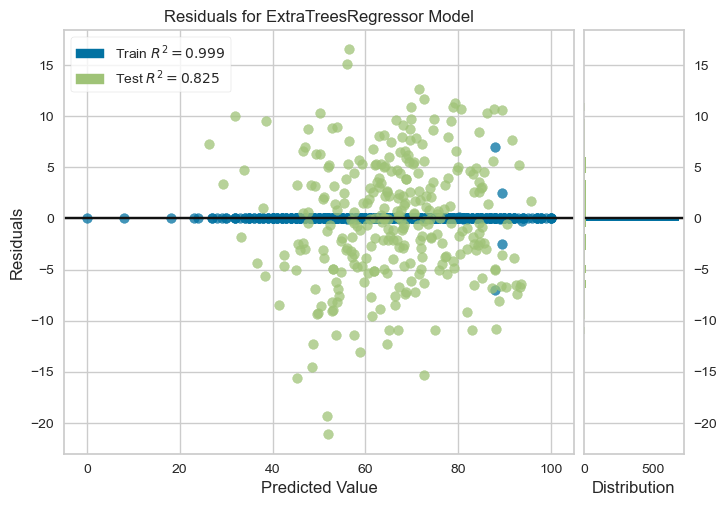

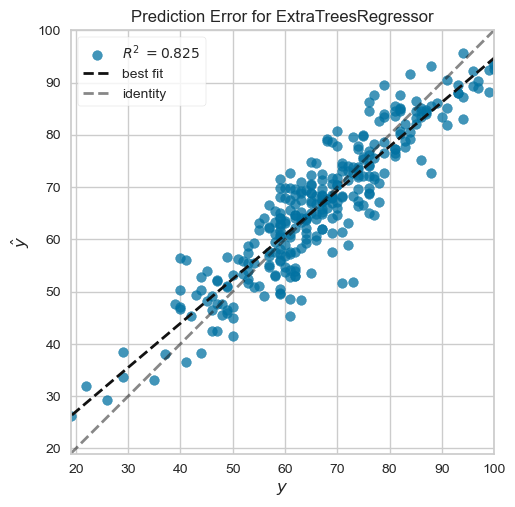

In [146]:
#Visualizando os residuais

plot_model(et)

#Visualizando o erro do modelo

plot_model(et, plot = 'error')

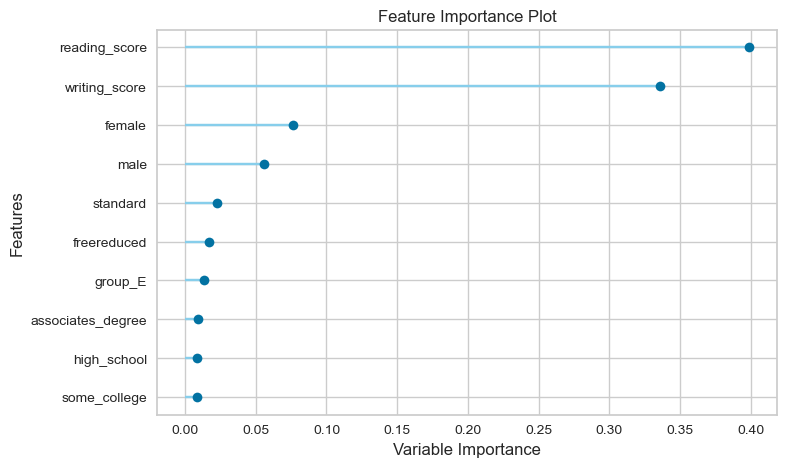

In [147]:
#Visualizando as features importantes

plot_model(et, plot='feature')

In [148]:
#Finaliza o modelo

final_et = finalize_model(et)

In [149]:
#Salva o modelo

save_model(final_et,'C:\\Users\\Rubeus\\Downloads\\Trabalho Airflow e StreamLit\\AirFlow\\modelo\\modelo')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Rubeus\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['reading_score', 'writing_score',
                                              'female', 'male', 'group_A',
                                              'group_B', 'group_C', 'group_D',
                                              'group_E', 'associates_degree',
                                              'bachelors_degree', 'high_school',
                                              'masters_degree', 'some_college',
                                              'some_high_school', 'freereduced',
                                              'standard', 'completed', 'none'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent')

In [150]:
model_test = load_model('C:\\Users\\Rubeus\\Downloads\\Trabalho Airflow e StreamLit\\AirFlow\\modelo\\modelo')

Transformation Pipeline and Model Successfully Loaded


In [151]:
data_teste = data.drop(["math_score"],axis=1)

predict_model(model_test, data=data_teste)

,reading_score,writing_score,female,male,group_A,group_B,group_C,group_D,group_E,associates_degree,bachelors_degree,high_school,masters_degree,some_college,some_high_school,freereduced,standard,completed,none,prediction_label
0,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,72.0
1,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,69.0
2,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,90.0
3,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,47.0
4,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99,95,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,88.0
996,55,55,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,62.0
997,71,65,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,59.0
998,78,77,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,68.0
